In [1]:
import pickle
import numpy as np
#
# Load np arrays (stored in a pickle file) from disk
#
pipeline_id = "A652_E-N_EI"
file = open("../data/datasets/" + pipeline_id + ".pickle", 'rb')
(X_train, y_train, min_y_train, max_y_train, 
 X_val, y_val, min_y_val, max_y_val, 
 X_test, y_test, min_y_test, max_y_test) = pickle.load(file)

In [2]:
X_train.shape, y_train.shape

((6751, 6, 23), (6751, 1))

In [3]:
X_train.reshape(6751, -1).shape

(6751, 138)

In [4]:
X_train2D = X_train.reshape(6751, -1)
X_train2D[0]

array([0.33070866, 0.30588235, 0.85869565, 0.43530943, 0.47745601,
       0.75      , 0.0669873 , 0.        , 0.3660535 , 0.65262158,
       0.43012276, 0.5747379 , 0.45036741, 0.39914207, 0.87445728,
       0.57240918, 0.57829098, 0.432517  , 0.54301394, 0.66054211,
       0.42500667, 0.86237235, 0.44717432, 0.35826772, 0.30882353,
       0.81521739, 0.41159642, 0.4359455 , 0.62940952, 0.01703709,
       0.        , 0.36256492, 0.64723808, 0.43334635, 0.6049703 ,
       0.55009321, 0.3796623 , 0.90670673, 0.55572111, 0.57116116,
       0.39991788, 0.53294886, 0.71968856, 0.39260728, 0.86383335,
       0.43876346, 0.35826772, 0.32058824, 0.86956522, 0.27965726,
       0.49823349, 0.5       , 0.        , 0.        , 0.34296157,
       0.69103694, 0.3957486 , 0.61372504, 0.60595273, 0.33330883,
       0.87512456, 0.57256289, 0.57352344, 0.36660069, 0.52698727,
       0.70668515, 0.39090863, 0.83717421, 0.4024541 , 0.37007874,
       0.33235294, 0.83695652, 0.48133856, 0.49933517, 0.37059

In [5]:
max_value_twod_row = np.amax(X_train2D, axis = 1)
max_value_twod_col = np.amax(X_train2D, axis = 0)

print("Row wise maximum: ", max_value_twod_row)
print("Column wise maximum: ", max_value_twod_col)

Row wise maximum:  [0.93814606 0.95385787 1.         ... 1.         1.         1.        ]
Column wise maximum:  [1.         0.97352941 1.         0.95516847 1.         1.
 1.         0.61842105 0.99783079 0.98312404 1.         0.98309288
 0.96949683 0.93222843 0.98565571 0.95299201 0.9639365  0.9698829
 0.9828184  0.96004603 0.97959913 1.         0.87097008 1.
 0.99117647 1.         1.         1.         1.         1.
 0.61842105 0.98674598 0.98312404 1.         1.         0.96949683
 0.92240559 0.98565571 0.96753682 0.9639365  0.99430039 0.97801586
 0.95429616 0.99204569 1.         0.87097008 0.91338583 1.
 1.         1.         1.         1.         1.         0.61513158
 0.96871224 0.98312404 0.94949834 1.         0.92295662 0.8907292
 0.98235558 0.96753682 0.9639365  0.9884789  0.96767843 0.95809567
 0.98886488 1.         0.87097008 0.91338583 1.         1.
 0.95516847 1.         1.         1.         1.         0.97450305
 0.98312404 0.92414565 1.         0.92295662 0.87795522 0.

In [6]:
min(y_train), max(y_train)

(array([0.00328947]), array([1.]))

In [8]:
import sys 
import os
sys.path.append(os.path.abspath("../src"))
import utils

In [11]:
from utils.model import NetOrdinalClassification
import torch

NUM_FEATURES = X_train.shape[2]
print(NUM_FEATURES)

NUM_CLASSES = 5

model = NetOrdinalClassification(in_channels=NUM_FEATURES, num_classes=NUM_CLASSES)

model.load_state_dict(torch.load('../models/best_' + pipeline_id + '.pt'))

y_pred = model.predict(X_test)

23
Evaluating ordinal classification model...


In [13]:
y_pred.shape

(963, 1)

In [15]:
X_test.shape

(963, 6, 23)

In [18]:
# y_test

In [1]:
import pandas as pd
df_a652 = pd.read_parquet(
        '../data/weather_stations/A652_1997_2022_preprocessed.parquet.gzip')

In [22]:
min(df_a652.index), max(df_a652.index)

(Timestamp('2007-05-18 18:00:00'), Timestamp('2021-12-31 23:00:00'))

In [24]:
df_a652.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126502 entries, 2007-05-18 18:00:00 to 2021-12-31 23:00:00
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   PRE_INS       126502 non-null  float64
 1   TEM_SEN       122417 non-null  float64
 2   VL_LATITUDE   126502 non-null  float64
 3   PRE_MAX       126467 non-null  float64
 4   RAD_GLO       119600 non-null  float64
 5   PTO_INS       122845 non-null  float64
 6   TEM_MIN       126462 non-null  float64
 7   VL_LONGITUDE  126502 non-null  float64
 8   UMD_MIN       122776 non-null  float64
 9   PTO_MAX       122766 non-null  float64
 10  VEN_DIR       117668 non-null  float64
 11  CHUVA         126502 non-null  float64
 12  PRE_MIN       126467 non-null  float64
 13  UMD_MAX       122791 non-null  float64
 14  VEN_VEL       126073 non-null  float64
 15  PTO_MIN       122759 non-null  float64
 16  TEM_MAX       126462 non-null  float64
 17  TEN_BAT       

In [28]:
df_a652[['TEM_MAX', 'PRE_MAX', 'UMD_MAX', 'wind_u', 'wind_v', 'CHUVA']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126502 entries, 2007-05-18 18:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TEM_MAX  126462 non-null  float64
 1   PRE_MAX  126467 non-null  float64
 2   UMD_MAX  122791 non-null  float64
 3   wind_u   117659 non-null  float64
 4   wind_v   117659 non-null  float64
 5   CHUVA    126502 non-null  float64
dtypes: float64(6)
memory usage: 6.8 MB


In [17]:
df_a652['UMD_MAX'][100:150]

Datetime
2007-05-24 13:00:00    77.0
2007-05-24 14:00:00    86.0
2007-05-24 15:00:00    76.0
2007-05-24 16:00:00    70.0
2007-05-24 17:00:00    71.0
2007-05-24 18:00:00    73.0
2007-05-24 19:00:00    75.0
2007-05-24 20:00:00    72.0
2007-05-24 21:00:00    72.0
2007-05-24 22:00:00    69.0
2007-05-24 23:00:00    67.0
2007-05-25 00:00:00    69.0
2007-05-25 01:00:00    70.0
2007-05-25 02:00:00    70.0
2007-05-25 03:00:00    68.0
2007-05-25 04:00:00    71.0
2007-05-25 05:00:00    68.0
2007-05-25 06:00:00    70.0
2007-05-25 07:00:00    71.0
2007-05-25 08:00:00    69.0
2007-05-25 09:00:00    68.0
2007-05-25 10:00:00    72.0
2007-05-25 11:00:00    71.0
2007-05-25 12:00:00    69.0
2007-05-25 13:00:00    77.0
2007-05-25 14:00:00    65.0
2007-05-25 15:00:00    65.0
2007-05-25 16:00:00    63.0
2007-05-25 17:00:00    66.0
2007-05-25 18:00:00    67.0
2007-05-25 19:00:00    69.0
2007-05-25 20:00:00    73.0
2007-05-25 21:00:00    74.0
2007-05-25 22:00:00    76.0
2007-05-25 23:00:00    76.0
2007-05-26 

In [27]:
df = df_a652['2007-09-25':'2007-09-27']
df[df_a652.UMD_MAX.isnull()]

/tmp/ipykernel_2432/3203796971.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df_a652.UMD_MAX.isnull()]


,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,...,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,wind_u,wind_v
Datetime,,,,,,,,,,,,,,,,,,,,,
2007-09-26 14:00:00,1023.3,20.2,-22.988333,NaN,288.8,15.6,NaN,-43.190556,NaN,NaN,...,0.6,NaN,NaN,12.9,NaN,21.0,18.9,81.0,-0.234439,0.552303


<AxesSubplot: title={'center': 'UMD_MAX'}, xlabel='Datetime'>

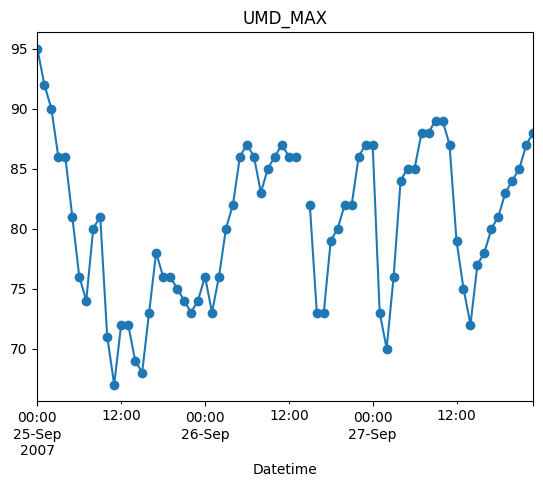

In [28]:
df['UMD_MAX'].plot(title="UMD_MAX", marker="o")

<AxesSubplot: title={'center': 'UMD_MAX'}, xlabel='Datetime'>

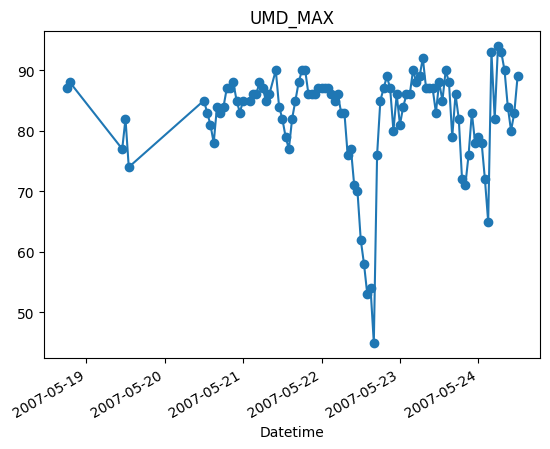

In [12]:
df_a652['UMD_MAX'][:100].plot(title="UMD_MAX", marker="o")

In [32]:
df_a652[df_a652.CHUVA > 0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11015 entries, 2007-05-23 16:00:00 to 2021-12-31 21:00:00
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRE_INS       11015 non-null  float64
 1   TEM_SEN       10432 non-null  float64
 2   VL_LATITUDE   11015 non-null  float64
 3   PRE_MAX       11009 non-null  float64
 4   RAD_GLO       9920 non-null   float64
 5   PTO_INS       10478 non-null  float64
 6   TEM_MIN       11009 non-null  float64
 7   VL_LONGITUDE  11015 non-null  float64
 8   UMD_MIN       10470 non-null  float64
 9   PTO_MAX       10473 non-null  float64
 10  VEN_DIR       10145 non-null  float64
 11  CHUVA         11015 non-null  float64
 12  PRE_MIN       11009 non-null  float64
 13  UMD_MAX       10483 non-null  float64
 14  VEN_VEL       10968 non-null  float64
 15  PTO_MIN       10467 non-null  float64
 16  TEM_MAX       11009 non-null  float64
 17  TEN_BAT       11015 non-null  floa

In [34]:
df_a652.describe()

,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,...,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,wind_u,wind_v
count,126502.000000,122417.000000,1.265020e+05,126467.000000,119600.000000,122845.000000,126462.000000,126502.000000,122776.000000,122766.000000,...,126073.000000,122759.000000,126462.00000,126502.000000,125999.000000,126502.000000,126498.000000,122848.000000,117659.000000,117659.000000
mean,1011.451502,22.781762,-2.298833e+01,1011.684394,723.796103,19.251937,22.948365,-43.190556,75.600907,19.750968,...,2.696388,18.767216,23.98270,12.956846,5.656151,25.367939,23.449409,78.043420,-0.371637,0.335305
std,4.790940,4.580786,7.105455e-15,4.771721,1083.892324,2.794178,2.880716,0.000000,11.900763,2.778483,...,2.138765,2.820460,3.27465,0.676457,3.196740,3.808637,3.079165,10.902007,3.084533,1.462664
min,994.700000,-2.700000,-2.298833e+01,994.800000,-3.500000,-9.200000,13.600000,-43.190556,14.000000,-2.200000,...,0.000000,-1.500000,14.30000,10.000000,0.000000,15.000000,14.300000,11.000000,-15.000000,-11.960672
25%,1008.000000,20.100000,-2.298833e+01,1008.300000,-1.600000,17.500000,20.900000,-43.190556,69.000000,18.000000,...,1.300000,17.000000,21.60000,12.500000,3.400000,23.000000,21.200000,72.000000,-1.980536,-0.514940
50%,1011.100000,23.100000,-2.298833e+01,1011.300000,32.000000,19.500000,22.700000,-43.190556,77.000000,19.900000,...,2.100000,19.000000,23.60000,12.600000,4.900000,25.000000,23.200000,79.000000,-0.612836,0.062819
75%,1014.700000,25.900000,-2.298833e+01,1014.900000,1215.925000,21.300000,24.800000,-43.190556,84.000000,21.700000,...,3.500000,20.800000,26.00000,13.500000,7.100000,28.000000,25.400000,86.000000,1.168432,0.957953
max,1028.800000,38.800000,-2.298833e+01,1028.800000,5308.300000,28.000000,37.800000,-43.190556,100.000000,32.900000,...,19.000000,26.900000,39.70000,14.500000,43.100000,41.000000,38.800000,100.000000,18.997106,12.623223


In [2]:
df = df_a652[['TEM_MAX', 'PRE_MAX', 'UMD_MAX', 'wind_u', 'wind_v', 'CHUVA']]
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126502 entries, 2007-05-18 18:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TEM_MAX  126462 non-null  float64
 1   PRE_MAX  126467 non-null  float64
 2   UMD_MAX  122791 non-null  float64
 3   wind_u   117659 non-null  float64
 4   wind_v   117659 non-null  float64
 5   CHUVA    126502 non-null  float64
dtypes: float64(6)
memory usage: 6.8 MB


In [10]:
df[df.isnull().any(axis=1)]

,TEM_MAX,PRE_MAX,UMD_MAX,wind_u,wind_v,CHUVA
Datetime,,,,,,
2007-07-11 13:00:00,23.0,1013.4,79.0,NaN,NaN,0.0
2007-07-25 23:00:00,24.2,1009.7,80.0,NaN,NaN,0.0
2007-09-26 14:00:00,NaN,NaN,NaN,-0.234439,0.552303,0.6
2007-11-02 00:00:00,34.0,1002.5,89.0,NaN,NaN,0.0
2008-03-19 14:00:00,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
2021-03-27 05:00:00,26.1,1009.7,87.0,NaN,NaN,0.0
2021-03-27 06:00:00,26.0,1009.0,87.0,NaN,NaN,0.0
2021-09-10 10:00:00,21.3,1012.4,95.0,NaN,NaN,0.0


In [9]:
df[df.isnull().any(axis=1) & (df.CHUVA == 0)]

,TEM_MAX,PRE_MAX,UMD_MAX,wind_u,wind_v,CHUVA
Datetime,,,,,,
2007-07-11 13:00:00,23.0,1013.4,79.0,NaN,NaN,0.0
2007-07-25 23:00:00,24.2,1009.7,80.0,NaN,NaN,0.0
2007-11-02 00:00:00,34.0,1002.5,89.0,NaN,NaN,0.0
2008-03-19 14:00:00,NaN,NaN,NaN,NaN,NaN,0.0
2010-02-08 05:00:00,25.5,1006.1,NaN,-0.567311,-0.195341,0.0
...,...,...,...,...,...,...
2021-03-27 05:00:00,26.1,1009.7,87.0,NaN,NaN,0.0
2021-03-27 06:00:00,26.0,1009.0,87.0,NaN,NaN,0.0
2021-09-10 10:00:00,21.3,1012.4,95.0,NaN,NaN,0.0


In [11]:
df[df.isnull().any(axis=1) & (df.CHUVA > 0)]

,TEM_MAX,PRE_MAX,UMD_MAX,wind_u,wind_v,CHUVA
Datetime,,,,,,
2007-09-26 14:00:00,NaN,NaN,NaN,-0.234439,0.552303,0.6
2010-02-18 06:00:00,24.3,1009.7,NaN,4.822145,1.660398,1.0
2010-02-18 07:00:00,24.1,1009.4,NaN,6.598503,2.017365,0.2
2010-02-18 08:00:00,24.0,1010.3,NaN,5.161240,0.633721,0.2
2010-02-18 09:00:00,23.7,1010.7,NaN,4.134648,1.504889,0.4
...,...,...,...,...,...,...
2019-12-06 18:00:00,19.8,1007.1,NaN,1.995128,-0.139513,0.4
2019-12-07 01:00:00,19.8,1010.1,NaN,-0.390682,-1.134622,0.2
2019-12-11 00:00:00,21.6,1009.1,NaN,2.068096,-0.364661,2.6


In [39]:
normalized_df.head()

,TEM_MAX,PRE_MAX,UMD_MAX,wind_u,wind_v,CHUVA
Datetime,,,,,,
2007-05-18 18:00:00,0.374016,0.450000,0.858696,0.535205,0.621124,0.0
2007-05-18 19:00:00,0.354331,0.458824,0.869565,0.572096,0.618026,0.0
2007-05-19 11:00:00,0.366142,0.541176,0.750000,0.434133,0.473530,0.0
2007-05-19 12:00:00,0.377953,0.550000,0.804348,0.415528,0.495381,0.0
2007-05-19 13:00:00,0.421260,0.561765,0.717391,0.539545,0.568231,0.0


In [42]:
import numpy as np
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(normalized_df)

array([[0.37401575, 0.45      , 0.85869565, 0.53520521, 0.62112351,
        0.        ],
       [0.35433071, 0.45882353, 0.86956522, 0.57209556, 0.61802619,
        0.        ],
       [0.36614173, 0.54117647, 0.75      , 0.43413324, 0.47353024,
        0.        ],
       ...,
       [0.38188976, 0.25588235, 0.88043478, 0.35602955, 0.49269842,
        0.0027933 ],
       [0.3976378 , 0.26176471, 0.86956522, 0.37698498, 0.47561867,
        0.        ],
       [0.39370079, 0.28529412, 0.86956522, 0.38559055, 0.51301099,
        0.        ]])

In [43]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126502 entries, 2007-05-18 18:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TEM_MAX  126462 non-null  float64
 1   PRE_MAX  126467 non-null  float64
 2   UMD_MAX  122791 non-null  float64
 3   wind_u   117659 non-null  float64
 4   wind_v   117659 non-null  float64
 5   CHUVA    126502 non-null  float64
dtypes: float64(6)
memory usage: 6.8 MB
